## Method
- Classify experiment_02_1SEPPexp_convergence results on "convergence succeded" and "convergence fail"
- Plot time points on each scenario
- Analyze points dispersion 

## Hypothesis:
Trainning time-points dispersion affects SEPP convergence.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from services.prediction_experiment import PredictionExperiment
from services.process_data import ProcessData

## SIEDCO

In [2]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_10032020.csv'
siedco_info = {'name':'SIEDCO','path':csv_path}

In [8]:
siedco_dict = {
                'date': 'FECHA_HECHO',
                'latitude': 'LATITUD_Y',
                'longitude': 'LONGITUD_X',
                'time': 'HORA_HECHO',
                'time_stamp':'TIME_STAMP'
               }

In [4]:
data = ProcessData('SIEDCO',csv_path)
df = data.get_formated_df()

## Convergence successful scenarios 

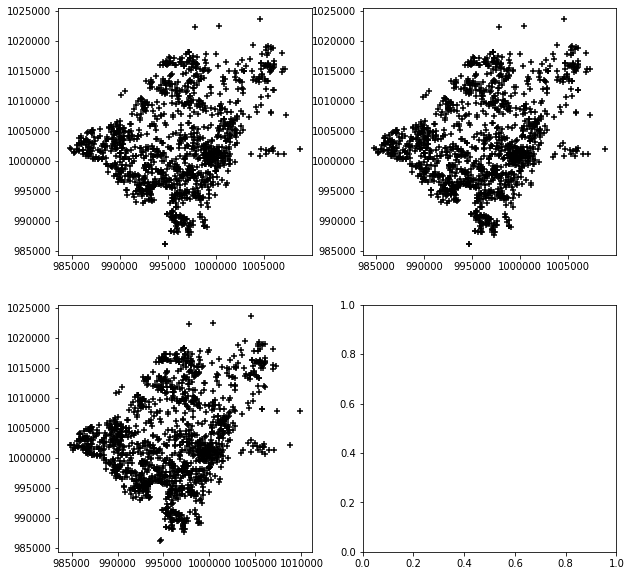

In [32]:
## City scope
initial_date = '2015-01-01'
final_date = '2015-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2015-01-31'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2015-02-01'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")


In [29]:
## Localidad, Ciudad Bolívar
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'CIUDAD BOLIVAR')

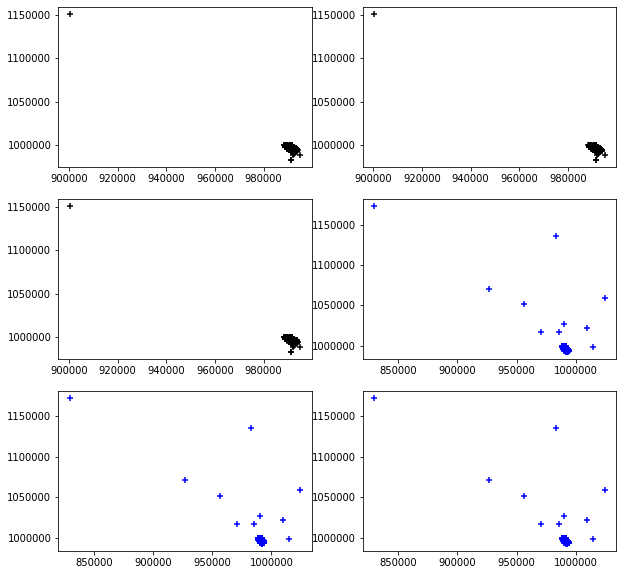

In [37]:
initial_date = '2016-01-01'
final_date = '2016-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2016-01-01'
final_date = '2016-07-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2016-01-01'
final_date = '2016-08-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2017-01-01'
final_date = '2017-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2017-01-01'
final_date = '2017-07-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2017-01-01'
final_date = '2017-08-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

In [45]:
## Localidad, Santa Fe
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'SANTA FE')

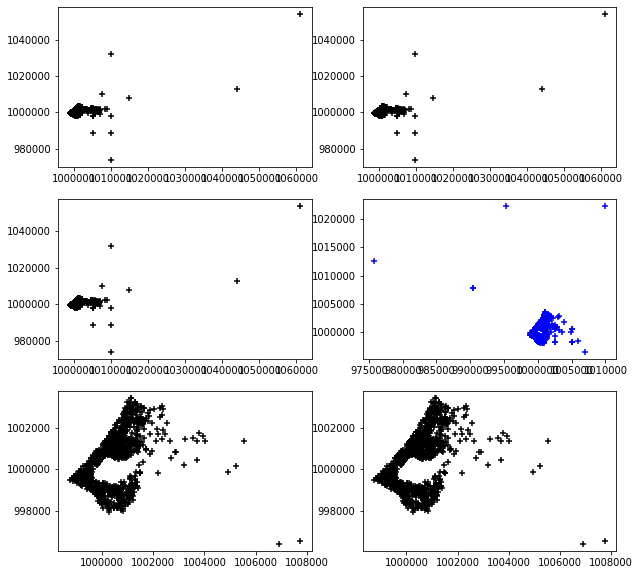

In [46]:
initial_date = '2015-01-01'
final_date = '2016-12-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2016-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

## Despite is on the same iteration loop, time elapsed on simulation was high (interrupted before get any result)
initial_date = '2015-01-01'
final_date = '2017-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")
#########

initial_date = '2017-01-01'
final_date = '2018-02-28'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2018-01-01'
final_date = '2018-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2018-01-01'
final_date = '2019-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[2,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

## Successful vs. fail convergence scenarios
Conventions = blue (successful); red (fail)

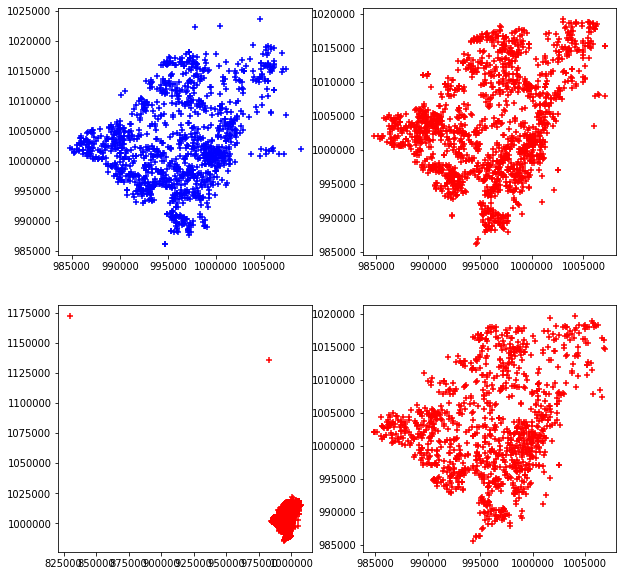

In [44]:
## City scope
initial_date = '2015-01-01'
final_date = '2015-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2016-01-01'
final_date = '2016-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")

initial_date = '2017-01-01'
final_date = '2017-01-30'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")

initial_date = '2018-01-01'
final_date = '2018-01-20'
df_filtered = ProcessData.filter_by_date(df, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")



In [47]:
## Localidad, Ciudad Bolívar
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'CIUDAD BOLIVAR')

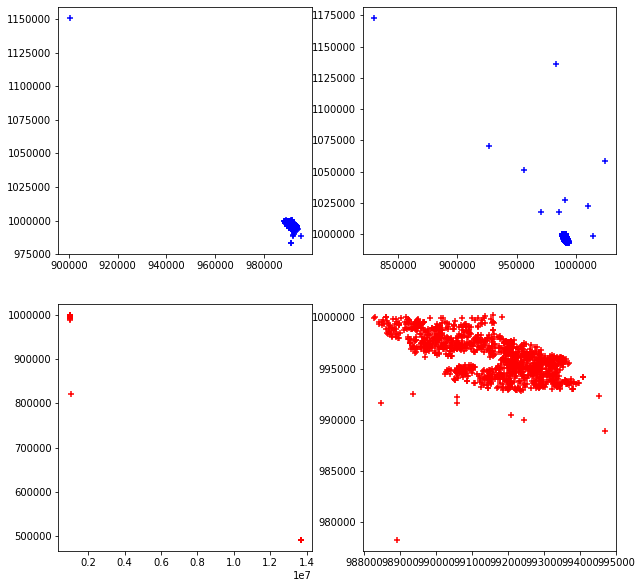

In [54]:
initial_date = '2016-01-01'
final_date = '2016-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2017-01-01'
final_date = '2017-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="blue")

initial_date = '2015-01-1'
final_date = '2015-09-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")

initial_date = '2018-01-01'
final_date = '2018-07-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")

In [55]:
## Localidad, Santa Fe
df_localidad = ProcessData.filter_by_field(df, 'LOCALIDAD', 'SANTA FE')

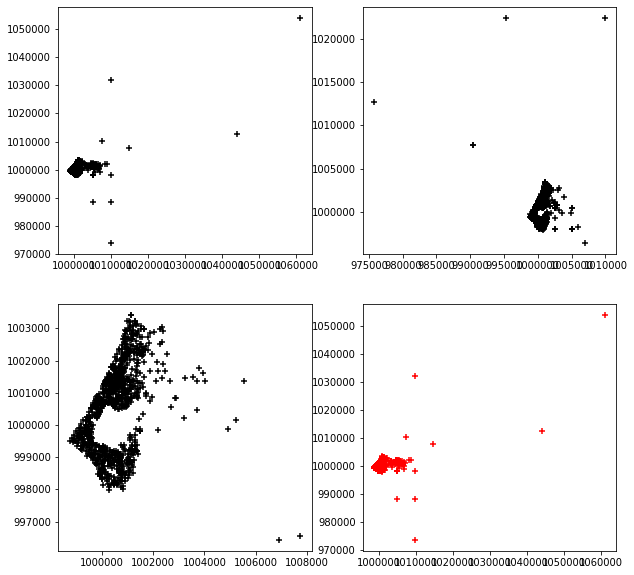

In [58]:
initial_date = '2015-01-01'
final_date = '2016-12-30'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2017-01-01'
final_date = '2018-02-28'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[0,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2018-01-01'
final_date = '2018-12-31'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,0].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="black")

initial_date = '2015-01-01'
final_date = '2017-01-01'
df_filtered = ProcessData.filter_by_date(df_localidad, siedco_dict, initial_date, final_date)
time_space_points, region = ProcessData.get_time_space_points(df_filtered, siedco_dict)
ax[1,1].scatter(time_space_points.xcoords, time_space_points.ycoords, marker="+", color="red")

